In [3]:
from tbparse import SummaryReader
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
from pathlib import Path
from shutil import copyfile
from enum import IntEnum

figure_width = 0.9

text_width = 5.59164
plt.rcParams.update({
    "text.usetex": False,
    "font.size": 12,
    "font.family" : "serif",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": (figure_width * text_width, figure_width * text_width * 0.75),
    "figure.autolayout": True,
})

reader = SummaryReader("../logs/moire/moire_jax_010noise_1")
scalars: pd.DataFrame = reader.scalars
hparams: pd.DataFrame = reader.hparams

reward_tag = "rollout/ep_rew_mean"
step_tag = "rollout/ep_len_mean"

approx_kl_tag = "train/approx_kl"
clip_frac_tag = "train/clip_fraction"
entropy_tag = "train/entropy_loss"
explained_var_tag = "train/explained_variance"
loss_tag = "train/loss"
policy_tag = "train/policy_gradient_loss"
std_tag = "train/std"
value_tag = "train/value_loss"

train_tags = [approx_kl_tag, clip_frac_tag, entropy_tag, explained_var_tag, loss_tag, policy_tag, std_tag, value_tag]

def get_value_of_tag(data, tag: str, sigma=1):
    grouped = data[combined.tag == tag].drop("tag", axis=1).groupby("step")
    mean = gaussian_filter1d(grouped.mean().value, sigma=sigma)
    std = gaussian_filter1d(grouped.std(ddof=0).value, sigma=sigma)
    index = grouped.mean().index
    return index, mean, std

class Params(IntEnum):
    algorithm = 0
    batch_size = 1
    ent_coef = 2
    gae_lambda = 3
    gamma = 4
    lr = 5
    n_steps = 6

hparams

,tag,value
0,algorithm,PPO
1,batch_size,32.0
2,ent_coef,0.01
3,gae_lambda,0.95
4,gamma,0.99
5,learning rate,0.0003
6,n_steps,128.0
7,noise,0.1


# Moire env plots

In [5]:
moire_dirs = list(Path("../logs/moire/").glob("moire*"))
moire_dirs = [str(x) for x in moire_dirs]

readers = [SummaryReader(x) for x in moire_dirs]
scalars: list[pd.DataFrame] = [x.scalars for x in readers]
hparams: list[pd.DataFrame] = [x.hparams for x in readers]

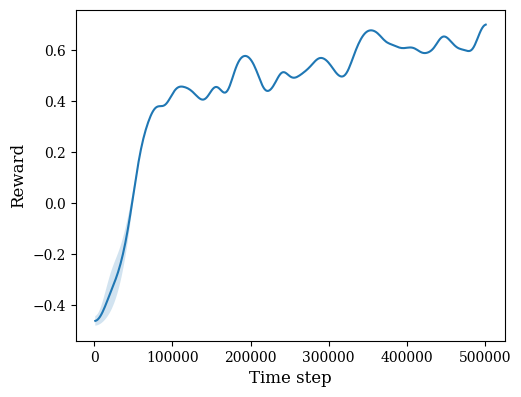

In [14]:
combined = pd.concat(scalars)
index, mean, std = get_value_of_tag(combined, reward_tag, sigma=5)

plt.plot(index, mean)
plt.fill_between(index, mean - std, mean + std, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.gca().set_xticks(np.linspace(0, 5e5, 6))

plt.tight_layout(pad=0)
plt.savefig("moire/Moire mean reward.pdf")
plt.show()

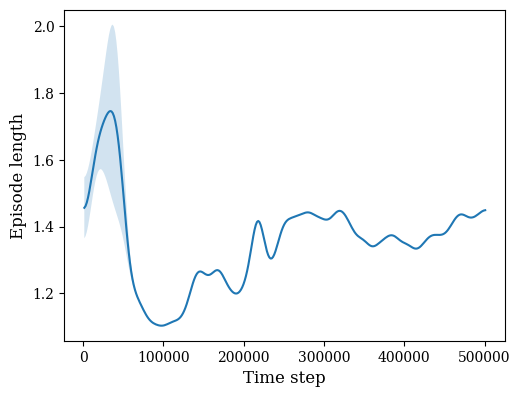

In [11]:
combined = pd.concat(scalars)
index, mean, std = get_value_of_tag(combined, step_tag, sigma=5)

plt.plot(index, mean)
plt.fill_between(index, mean - std, mean + std, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("Episode length")
plt.gca().set_xticks(np.linspace(0, 5e5, 6))

plt.tight_layout(pad=0)
plt.savefig("moire/Moire mean len.pdf")
plt.show()

# Zeeman env plots

In [28]:
zeeman_dirs = list(Path("../logs/zeeman/").glob("zeeman_jax_010*"))
zeeman_dirs = [str(x) for x in zeeman_dirs]

readers = [SummaryReader(x) for x in zeeman_dirs]
scalars: list[pd.DataFrame] = [x.scalars for x in readers]
hparams: list[pd.DataFrame] = [x.hparams for x in readers]

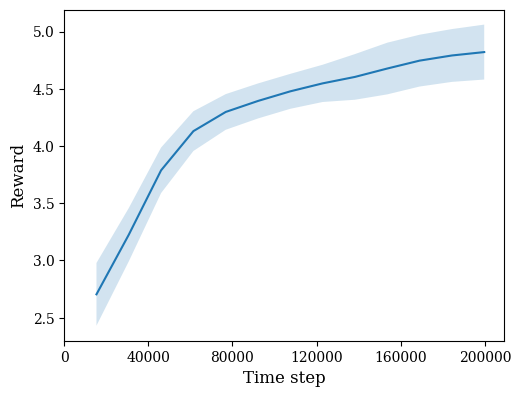

In [29]:
combined = pd.concat(scalars)
index, mean, std = get_value_of_tag(combined, reward_tag, sigma=1)

plt.plot(index, mean)
plt.fill_between(index, mean - std, mean + std, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.gca().set_xticks(np.linspace(0, 2e5, 6))

plt.tight_layout(pad=0)
plt.savefig("zeeman/Zeeman mean reward.pdf")
plt.show()

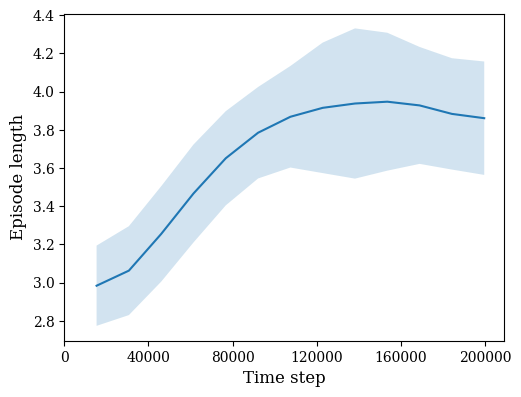

In [30]:
combined = pd.concat(scalars)
index, mean, std = get_value_of_tag(combined, step_tag, sigma=1)

plt.plot(index, mean)
plt.fill_between(index, mean - std, mean + std, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("Episode length")
plt.gca().set_xticks(np.linspace(0, 2e5, 6))

plt.tight_layout(pad=0)
plt.savefig("zeeman/Zeeman mean len.pdf")
plt.show()

# Conductance plots

In [33]:
conductance_dirs = list(Path("../logs/conductance/").glob("conductance_010*"))
conductance_dirs = [str(x) for x in conductance_dirs]

readers = [SummaryReader(x) for x in conductance_dirs]
scalars: list[pd.DataFrame] = [x.scalars for x in readers]
hparams: list[pd.DataFrame] = [x.hparams for x in readers]
combined = pd.concat(scalars)

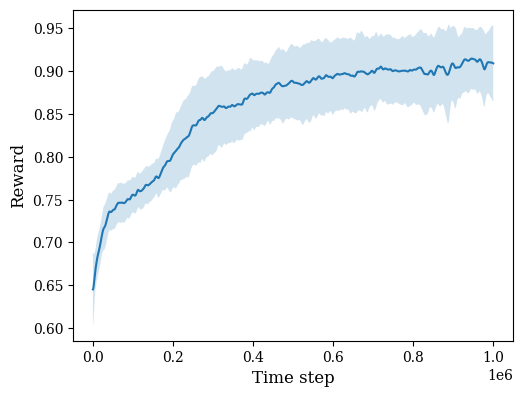

In [38]:
index, mean, std = get_value_of_tag(combined, reward_tag, sigma=10)

plt.plot(index, mean)
plt.fill_between(index, mean - std, mean + std, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("Reward")

plt.tight_layout(pad=0)
plt.savefig("conductance/conductance mean reward.pdf")
plt.show()

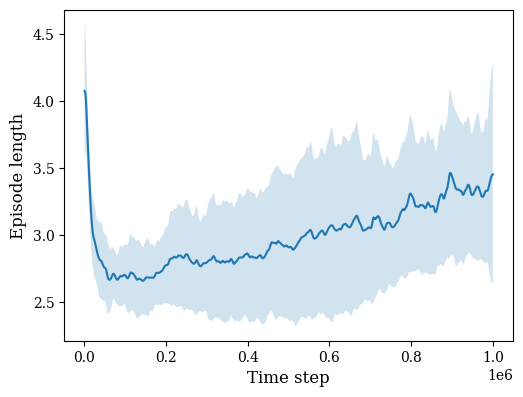

In [37]:
index, mean, std = get_value_of_tag(combined, step_tag, sigma=10)

plt.plot(index, mean)
plt.fill_between(index, mean - std, mean + std, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("Episode length")

plt.tight_layout(pad=0)
plt.savefig("conductance/conductance mean len.pdf")
plt.show()